# data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE

In [2]:
# create a plot of generated images (reversed grayscale)
def show_plot(examples, n, with_channel=True):
    # plot images
    for i in range(n * n):
        # define subplot
        plt.subplot(n, n, 1 + i)
        # turn off axis
        plt.axis('off')
        # plot raw pixel data
        if with_channel:
            # shape = (n_sample, x_axis, y_axis, channel)
            plt.imshow(examples[i, :, :, 0], cmap='gray_r')
        else:
            # shape = (n_sample, x_axis, y_axis)
            plt.imshow(examples[i], cmap='gray_r')
            
    plt.show()
    
def t_sne_visualize(x, y):
    tsne = TSNE(n_components=2, random_state=0)
    tsne_obj = tsne.fit_transform(x)

    tsne_df = pd.DataFrame({'X': tsne_obj[:, 0],
                            'Y': tsne_obj[:, 1],
                            'classes': y})
    sns.scatterplot(x="X", y="Y",
                    hue="classes",
                    legend='full',
                    size=0.5,
                    alpha=0.2,
                    data=tsne_df)
    plt.show()

In [3]:
from keras.datasets import mnist
from keras.utils.np_utils import to_categorical # convert to one-hot-encoding

(x_train, y_train), (x_test, y_test) = mnist.load_data()

# data pre-processing
# flat the input data
x_train = x_train.reshape(*x_train.shape, 1) / 255.    # normalize
x_test = x_test.reshape(*x_test.shape, 1) / 255.      # normalize

# one-hot output data
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

Using TensorFlow backend.
/home/congyu/.virtualenvs/congyuml/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/congyu/.virtualenvs/congyuml/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/congyu/.virtualenvs/congyuml/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/congyu/.virtua

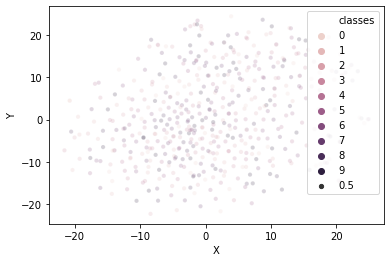

In [4]:
t_sne_visualize(x_test.reshape(x_test[:500].shape[0], -1), [np.argmax(y) for y in y_test[:500]])

# models

In [5]:
from models.autoencoder_cnn import CAE

In [6]:
model = CAE()
model.model.summary()

init

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
model_1 (Model)              (None, 49)                84017     
_________________________________________________________________
model_2 (Model)              (None, 28, 28, 1)         56833     
Total params: 140,850
Trainable params: 140,594
Non-trainable params: 256
_________________________________________________________________


In [7]:
model.fit(x_train, x_train, epochs=10, validation_split=0.2)


Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 14s 291us/step - loss: 0.0169 - val_loss: 0.0115
Epoch 2/10
48000/48000 [==============================] - 13s 276us/step - loss: 0.0099 - val_loss: 0.0233
Epoch 3/10
48000/48000 [==============================] - 13s 267us/step - loss: 0.0087 - val_loss: 0.0097
Epoch 4/10
48000/48000 [==============================] - 13s 266us/step - loss: 0.0081 - val_loss: 0.0104
Epoch 5/10
48000/48000 [==============================] - 13s 277us/step - loss: 0.0077 - val_loss: 0.0161
Epoch 6/10
48000/48000 [==============================] - 13s 271us/step - loss: 0.0073 - val_loss: 0.0375
Epoch 7/10
48000/48000 [==============================] - 13s 269us/step - loss: 0.0071 - val_loss: 0.0171
Epoch 8/10
48000/48000 [==============================] - 13s 279us/step - loss: 0.0069 - val_loss: 0.0149
Epoch 9/10
48000/48000 [==============================] - 13s 271us/step - loss: 0.0067 - val

In [8]:
x_train_r = model.reconstruct(x_train[:10])

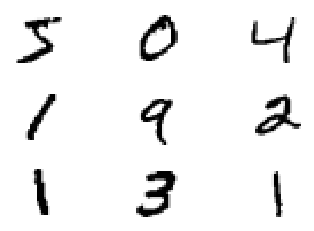

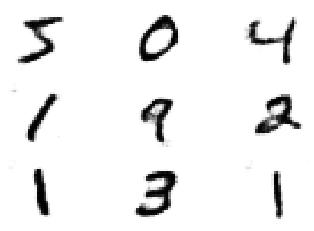

In [9]:
show_plot(x_train, 3)
show_plot(model.reconstruct(x_train[:10]), 3)

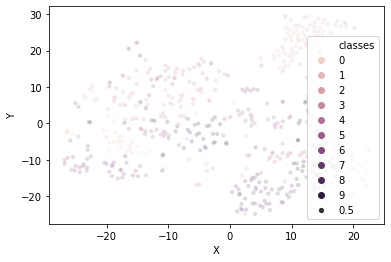

In [10]:
xcode = model.predict(x_test[:500])
t_sne_visualize(xcode.reshape(xcode.shape[0], -1), [np.argmax(y) for y in y_test[:500]])